<a href="https://colab.research.google.com/github/jassynavarro/CCADMACL_EXERCISES/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

Netflix is the world's largest online streaming service provider, with over 220 million subscribers. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscribers from ending their subscription.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

## Instructions

1. Your task is to group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other. Use Principal Component Analysis and any Clustering Algorithm.

2. After creating the clusters, profile each cluster that you have created.

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [65]:
df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXERCISES/blob/353cd84703a9e313ee7ecf37fb97a067aa81ddbc/netflix.csv?raw=true")

In [66]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [68]:
#Dropping some of the redundant features
to_drop = ["show_id", "title","director", "cast", "date_added", "listed_in", "description"]
df.drop(to_drop, axis=1, inplace=True)
print("The total number of data-points after removing the rows with missing values are:", len(df))

The total number of data-points after removing the rows with missing values are: 7787


In [69]:
country_mapping = {country: idx for idx, country in enumerate(df["country"].unique())}
df["country"] = df["country"].map(country_mapping)

df["duration"] = df["duration"].str.extract("(\d+)")  # Extract only digits
df["duration"] = df["duration"].astype(int)  # Convert to integer (optional)

df["type"] = df["type"].map({"Movie": 0, "TV Show": 1}).astype(int)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   int64 
 1   country       7787 non-null   int64 
 2   release_year  7787 non-null   int64 
 3   rating        7780 non-null   object
 4   duration      7787 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 304.3+ KB


In [71]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['rating']


In [72]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [73]:
df.head()

,type,country,release_year,rating,duration
0,1,0,2020,8,4
1,0,1,2016,8,93
2,0,2,2011,5,78
3,0,3,2009,4,80
4,0,3,2008,4,123


In [74]:
from sklearn.preprocessing import StandardScaler

#Scaling
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )
print("All features are now scaled")

All features are now scaled


In [75]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_df.head()

Dataframe to be used for further modelling:


,type,country,release_year,rating,duration
0,1.493694,-0.422513,0.692878,0.486133,-1.278234
1,-0.669481,-0.414043,0.236092,0.486133,0.468664
2,-0.669481,-0.405573,-0.334890,-1.049159,0.174243
3,-0.669481,-0.397103,-0.563284,-1.560922,0.213499
4,-0.669481,-0.397103,-0.677480,-1.560922,1.057505


In [76]:
# put your answer here
df.shape

(7787, 5)

1. Apply dimensionality reduction using Principal Component Analysis
- Use the necessary number of principal components

In [77]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,7787.0,-4.379870e-17,1.481931,-3.170029,-1.667460,0.410878,1.117795,4.563960
col2,7787.0,-1.459957e-17,1.000475,-4.666772,-0.363841,-0.149346,0.050932,5.108936
col3,7787.0,-1.459957e-17,0.974620,-7.872208,-0.521041,0.096827,0.767336,2.222883


In [78]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

PC2_explainedvariance = explained_variance[2]
print("Explained variance of PC2", PC2_explainedvariance)

Explained variance of PC1 0.4391675214811994
Explained variance of PC2 0.20016430590580336
Explained variance of PC2 0.18995251697589335


2. Create a scree plot for each principal component

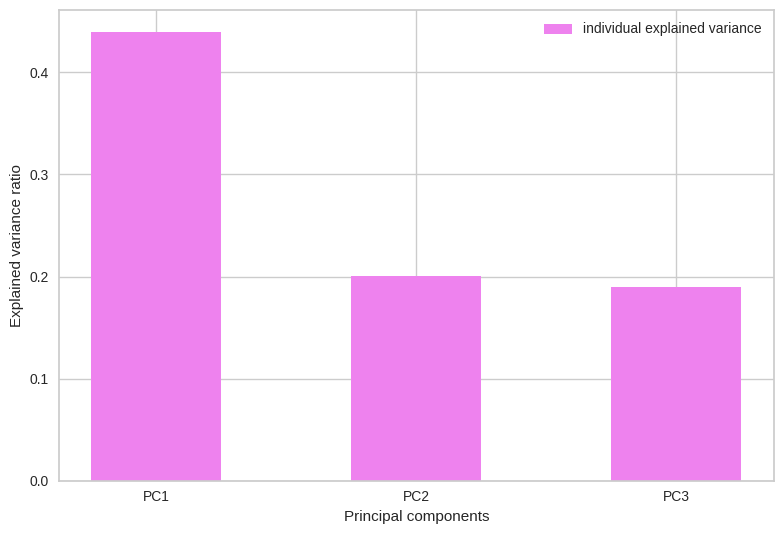

In [79]:
plt.figure()
principalcomponents = ['PC1', 'PC2', 'PC3']

plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

In [80]:
PCA_df = pd.DataFrame({'PC1': PCA_df['col1'], 'PC2': PCA_df['col2'], 'PC3': PCA_df['col3']})
PCA_df.head()

,PC1,PC2,PC3
0,-2.130810,-0.230546,-0.054042
1,0.400816,-0.129284,0.898711
2,0.980651,-0.575993,-0.187466
3,1.271415,-0.727751,-0.540083
4,1.832400,-0.728297,-0.386559


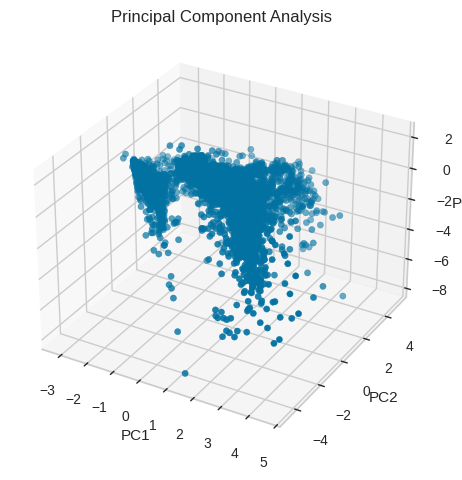

In [81]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

ax.scatter(PCA_df['PC1'], PCA_df['PC2'], PCA_df['PC3'])  # Use ax.scatter for 3D plotting
ax.set_title('Principal Component Analysis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')  # Use ax.set_zlabel for setting the z-axis label

plt.show()

3. Use any clustering algorithm to create clusters

Elbow Method to determine the number of clusters to be formed:


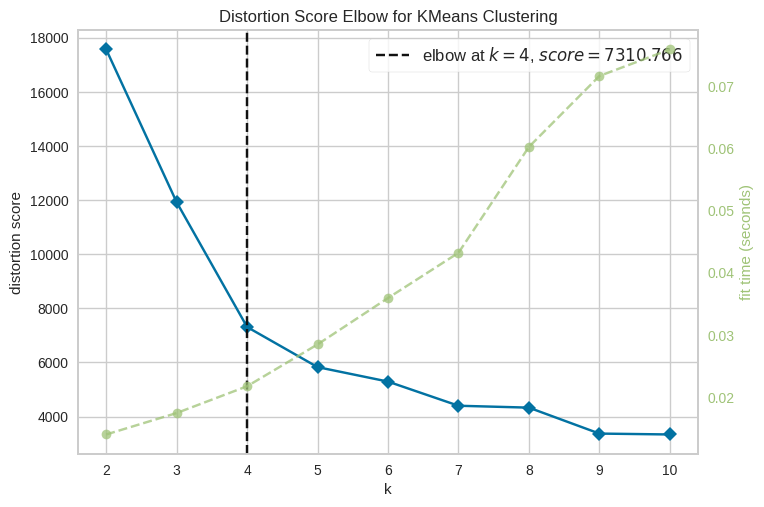

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
# put your answer here
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

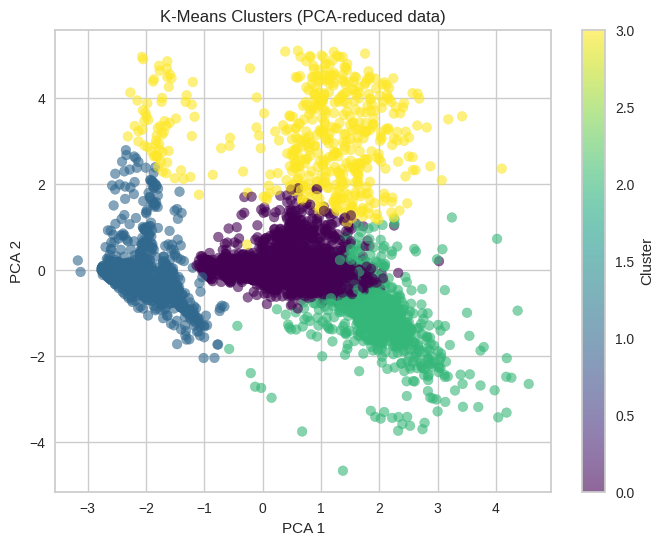

In [83]:
# Step 2: Apply K-Means with the chosen k (from the elbow plot)
optimal_k = 4  # Replace with the optimal k you selected from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit K-Means to the data
kmeans.fit(PCA_df)

# Step 3: Access the Cluster Labels
labels = kmeans.labels_

# Optionally, add the cluster labels back to the dataframe
PCA_df['Cluster'] = labels  # Assuming PCA_df is your PCA-reduced data

# Step 4: Visualize the Clusters
# You can visualize the clusters if PCA_df has been reduced to 2D already (as shown in previous examples)
plt.figure(figsize=(8, 6))
plt.scatter(PCA_df.iloc[:, 0], PCA_df.iloc[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title('K-Means Clusters (PCA-reduced data)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

df['Cluster'] = kmeans.labels_  # Add the cluster labels as a new column to your DataFrame

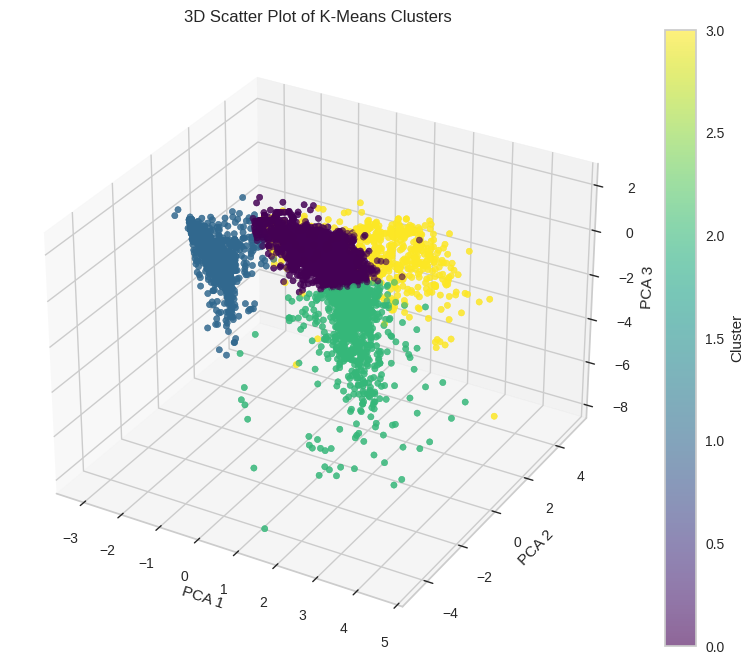

In [84]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 3: Plotting in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D: points colored by their cluster label
ax.scatter(PCA_df.iloc[:, 0], PCA_df.iloc[:, 1], PCA_df.iloc[:, 2], c=PCA_df['Cluster'], cmap='viridis', alpha=0.6)

# Add labels and title
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3D Scatter Plot of K-Means Clusters')

# Add colorbar
cbar = fig.colorbar(ax.scatter(PCA_df.iloc[:, 0], PCA_df.iloc[:, 1], PCA_df.iloc[:, 2], c=PCA_df['Cluster'], cmap='viridis', alpha=0.6))
cbar.set_label('Cluster')

plt.show()

In [85]:
# Number of data points in each cluster
cluster_sizes = pd.Series(labels).value_counts()

# Display cluster sizes
print(cluster_sizes)

0    3999
1    2337
2     944
3     507
Name: count, dtype: int64


In [86]:
# Add the cluster labels back to your dataframe (if not already done)
PCA_df['Cluster'] = labels

# Group data by clusters and generate descriptive statistics for each
cluster_profile = PCA_df.groupby('Cluster').describe()

# Display the cluster profiles
print(cluster_profile)

            PC1                                                              \
          count      mean       std       min       25%       50%       75%   
Cluster                                                                       
0        3999.0  0.604948  0.557796 -1.133468  0.271155  0.600319  1.025424   
1        2337.0 -1.994902  0.337159 -3.170029 -2.165258 -2.066178 -1.724764   
2         944.0  1.895587  0.577317 -0.574282  1.561690  1.805891  2.177524   
3         507.0  0.894403  1.187660 -2.312339  0.617560  1.137998  1.630271   

                      PC2            ...                         PC3  \
              max   count      mean  ...       75%       max   count   
Cluster                              ...                               
0        3.025256  3999.0 -0.024764  ...  0.074304  1.907804  3999.0   
1       -0.656633  2337.0 -0.217718  ... -0.134955  2.794043  2337.0   
2        4.563960   944.0 -1.001724  ... -0.615325  1.227120   944.0   
3        4.101

In [87]:
# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame with the centroids for better readability
centroid_df = pd.DataFrame(centroids, columns=['PC1', 'PC2', 'PC3'])  # Adjust for number of components used
print(centroid_df)


        PC1       PC2       PC3
0  0.605900 -0.025287  0.703766
1 -1.994902 -0.217718 -0.453814
2  1.897025 -1.003656 -1.182927
3  0.894403  3.064037 -1.271523


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(PCA_df, hue='Cluster')
plt.show()

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x='Cluster', data=PCA_df, palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
pl = sns.scatterplot(data = df,x=df["country"], y=df["rating"],hue=df["Cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [ ]:
for col in df.columns:

  plt.figure()
  pl=sns.boxenplot(y=df[col],x=df["Cluster"], palette= pal)
  pl.set_title({col})
  plt.show()

4. Profile each cluster that you have generated based on your experiments

# **Cluster 0:**
- Shows and movies with general to mature parental ratings (TV-PG, TV-14, R).
- Typically moderate-length to shorter durations.
- Released mostly in recent years.
- A mix of movies and TV shows, but predominantly movies.
- Popular across multiple countries.

# **Cluster 1:**
- Shows and movies with general to mature parental ratings (TV-PG, TV-14, R).
- Tend to have shorter durations.
- Mostly recent releases.
- Entirely TV shows.
- Popular in specific regions.

# **Cluster 2:**
- Shows and movies with general to restricted parental ratings (TV-G, PG-13, R).
- Typically moderate-length durations.
- Released across various years, including some past decades.
- A mix of movies and TV shows, but primarily movies.
- Popular across diverse audiences.

# **Cluster 3:**
- Shows and movies with moderate parental ratings (PG-13, TV-14).
- Tend to have moderate to shorter durations.
- Released mostly in recent and past years.
- Mainly movies.
- Widely viewed across different countries.

# **Conclusion:**
By clustering Netflix's shows and movies based on ratings, duration, release years, and country we can identify distinct patterns in content consumption.

- Cluster 0 and Cluster 1 primarily consist of recently released content, with Cluster 1 exclusively featuring TV shows and Cluster 0 being a mix of movies and TV shows. These clusters may appeal to audiences who prefer newer content with shorter or moderate runtimes.

- Cluster 2 includes a broader range of release years and moderate-length content, making it suitable for viewers who enjoy both classic and contemporary titles.

- Cluster 3 features mostly movies with moderate parental ratings, appealing to a global audience that prefers widely accessible films with a mix of recent and older releases.

In [ ]:
# put your answer here
# Define the columns of interest for Netflix movies dataset
Netflix_features = ["type", "country", "release_year", "rating", "duration"]  # Update based on your relevant features

# Loop through each feature and plot the jointplot with "Spent" replaced by "rating" or other relevant target
for feature in Netflix_features:
    plt.figure()
    sns.jointplot(x=df[feature], y=df["rating"], hue=df["Cluster"], kind="kde", palette='viridis')  # Use a suitable palette like 'viridis'
    plt.show()
